In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

# Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#Digit MNIST dataset
(x_train_digit , y_train_digit),(x_test_digit , y_test_digit) = mnist.load_data()

In [3]:
x_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

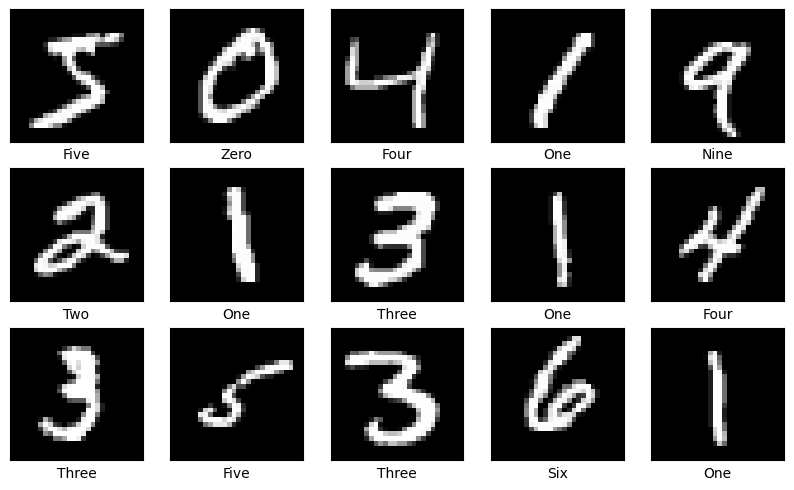

In [5]:
# Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

# Visualization the digits
plt.figure (figsize = (10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i],cmap = 'gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [6]:
x_train_digit.shape

(60000, 28, 28)

In [7]:
x_train_digit = x_train_digit.reshape(60000,784)
x_test_digit = x_test_digit.reshape(10000,784)

In [8]:
x_train_digit.shape

(60000, 784)

In [9]:
# Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit,num_classes = 10)
y_test_digit = to_categorical(y_test_digit,num_classes = 10)

In [10]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
y_train_digit[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
y_train_digit[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
# Creating base neural network
model = keras.Sequential([
    layers.Dense(256,activation = 'relu',input_shape=(784,)),
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    layers.Dense(64,activation = 'relu'),
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    layers.Dense(64,activation = 'relu'),
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    layers.Dense(10,activation = 'sigmoid'),
])

In [14]:
# Param_number = output_channel_number * (input_channel_number +1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compiling the model
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

In [16]:
history = model.fit(x_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(x_test_digit,y_test_digit))

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 1.3600 - accuracy: 0.8206 - val_loss: 0.3559 - val_accuracy: 0.9070
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2837 - accuracy: 0.9236 - val_loss: 0.2465 - val_accuracy: 0.9338
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2010 - accuracy: 0.9440 - val_loss: 0.2147 - val_accuracy: 0.9445
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1581 - accuracy: 0.9569 - val_loss: 0.1996 - val_accuracy: 0.9521
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1419 - accuracy: 0.9600 - val_loss: 0.1743 - val_accuracy: 0.9599
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1249 - accuracy: 0.9649 - val_loss: 0.1726 - val_accuracy: 0.9586
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1122 - accuracy: 0.9695 - val_loss: 0.1738 - val_accuracy: 0.9623
Epoch 

In [17]:
# Predicting the Labels -DIGIT
y_predict = model.predict(x_test_digit)

313/313 [==============================] - 0s 776us/step


In [18]:
y_predict

array([[5.7268941e-01, 9.4101709e-01, 8.7045944e-01, ..., 1.0000000e+00,
        6.8961829e-01, 9.9984097e-01],
       [9.3822950e-01, 9.9929535e-01, 1.0000000e+00, ..., 9.9750876e-01,
        5.2762002e-01, 1.7619485e-01],
       [9.8884165e-01, 1.0000000e+00, 9.9855042e-01, ..., 9.9990892e-01,
        9.9997288e-01, 7.1717471e-01],
       ...,
       [4.1003076e-08, 7.3967527e-08, 9.9997205e-01, ..., 9.9861044e-01,
        9.9986786e-01, 1.0000000e+00],
       [4.0879102e-05, 1.5183538e-05, 1.1166021e-06, ..., 8.1022136e-04,
        9.9639487e-01, 8.9491343e-01],
       [9.9999809e-01, 1.8368749e-03, 9.9497724e-01, ..., 9.8140681e-01,
        9.9999797e-01, 1.0254880e-01]], dtype=float32)

In [19]:
y_predicts=np.argmax(y_predict,axis=1)# Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [20]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


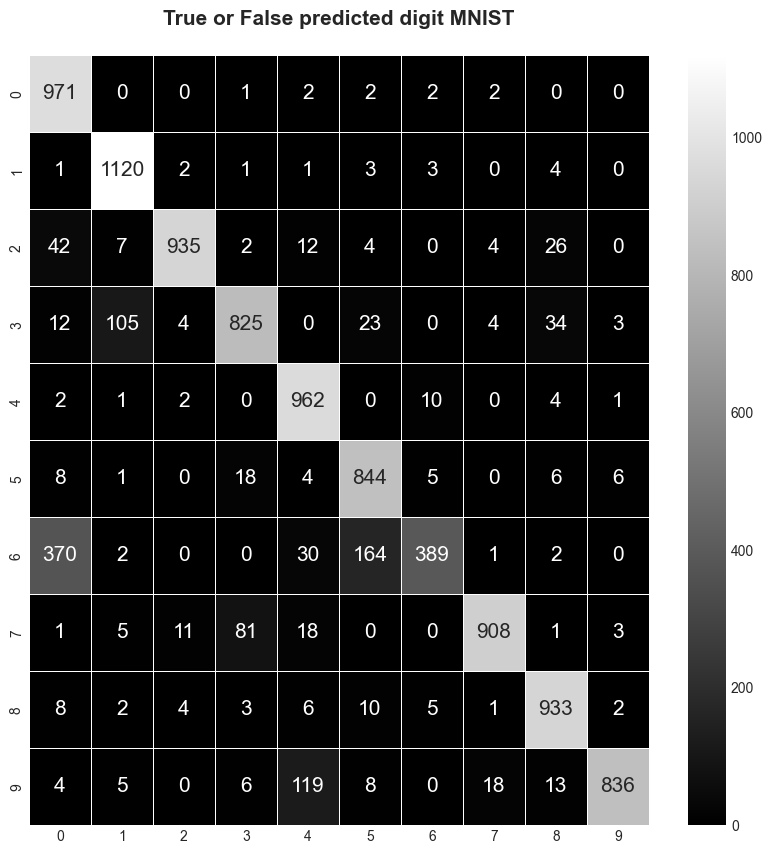

In [23]:
# Confusion matrix for Digit MINIST
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-v0_8-dark')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.68      0.99      0.81       980
           1       0.90      0.99      0.94      1135
           2       0.98      0.91      0.94      1032
           3       0.88      0.82      0.85      1010
           4       0.83      0.98      0.90       982
           5       0.80      0.95      0.87       892
           6       0.94      0.41      0.57       958
           7       0.97      0.88      0.92      1028
           8       0.91      0.96      0.93       974
           9       0.98      0.83      0.90      1009

    accuracy                           0.87     10000
   macro avg       0.89      0.87      0.86     10000
weighted avg       0.89      0.87      0.87     10000



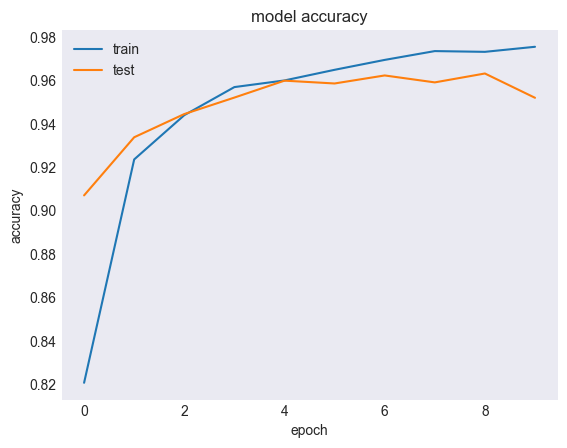

In [25]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

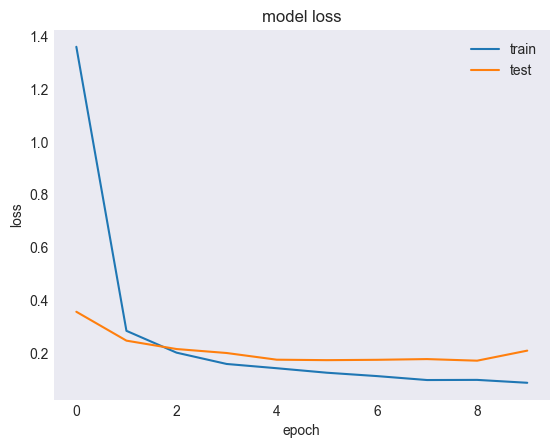

In [26]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [27]:
# tf.expand_dims(x_test_digit[0])
y_predict_single = model.predict(x_test_digit[[2]])
y_predicts_single = np.argmax(y_predict_single,axis = 1)#Hence we get the index of maximum value in the encoded vector
y_test_digit_eval = np.argmax(y_test_digit,axis=1)

1/1 [==============================] - 0s 15ms/step


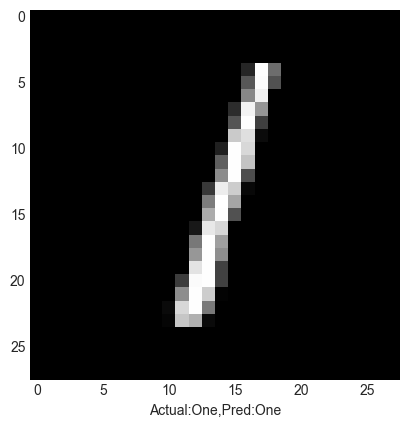

In [44]:
# Names of numbers in dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

# Visualizing the digits
# plt.figure (fig size =(10,10))
plt.imshow(x_test_digit[2].reshape(28,28),cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()